## Import Libraries and Upload Data

In [126]:
# Import Libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 

from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

from sklearn import metrics
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_auc_score, roc_curve
from mlxtend.plotting import plot_confusion_matrix

In [127]:
# Load Data
data = pd.read_csv("customer_churn-training_dataset.csv")

## Understand Data

In [128]:
# Display Data
data.head()

,CustomerID,Age,Gender,Tenure,Usage Frequency,Support Calls,Payment Delay,Subscription Type,Contract Length,Total Spend,Last Interaction,Churn
0,2.0,30.0,Female,39.0,14.0,5.0,18.0,Standard,Annual,932.0,17.0,1.0
1,3.0,65.0,Female,49.0,1.0,10.0,8.0,Basic,Monthly,557.0,6.0,1.0
2,4.0,55.0,Female,14.0,4.0,6.0,18.0,Basic,Quarterly,185.0,3.0,1.0
3,5.0,58.0,Male,38.0,21.0,7.0,7.0,Standard,Monthly,396.0,29.0,1.0
4,6.0,23.0,Male,32.0,20.0,5.0,8.0,Basic,Monthly,617.0,20.0,1.0


#### Brief About Terms/Variables:
- ***Churn*** = The churn label indicates whether the customer has churned (1) or not (0)  


In [129]:
# Display Data Information
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 440833 entries, 0 to 440832
Data columns (total 12 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   CustomerID         440832 non-null  float64
 1   Age                440832 non-null  float64
 2   Gender             440832 non-null  object 
 3   Tenure             440832 non-null  float64
 4   Usage Frequency    440832 non-null  float64
 5   Support Calls      440832 non-null  float64
 6   Payment Delay      440832 non-null  float64
 7   Subscription Type  440832 non-null  object 
 8   Contract Length    440832 non-null  object 
 9   Total Spend        440832 non-null  float64
 10  Last Interaction   440832 non-null  float64
 11  Churn              440832 non-null  float64
dtypes: float64(9), object(3)
memory usage: 40.4+ MB


- There are 440.833 entries  
- We have 12 features (3 categorical, 9 numerical (all floats))  
- There is NULL values.  

In [130]:
# Display Data Description
data.describe()

,CustomerID,Age,Tenure,Usage Frequency,Support Calls,Payment Delay,Total Spend,Last Interaction,Churn
count,440832.000000,440832.000000,440832.000000,440832.000000,440832.000000,440832.000000,440832.000000,440832.000000,440832.000000
mean,225398.667955,39.373153,31.256336,15.807494,3.604437,12.965722,631.616223,14.480868,0.567107
std,129531.918550,12.442369,17.255727,8.586242,3.070218,8.258063,240.803001,8.596208,0.495477
min,2.000000,18.000000,1.000000,1.000000,0.000000,0.000000,100.000000,1.000000,0.000000
25%,113621.750000,29.000000,16.000000,9.000000,1.000000,6.000000,480.000000,7.000000,0.000000
50%,226125.500000,39.000000,32.000000,16.000000,3.000000,12.000000,661.000000,14.000000,1.000000
75%,337739.250000,48.000000,46.000000,23.000000,6.000000,19.000000,830.000000,22.000000,1.000000
max,449999.000000,65.000000,60.000000,30.000000,10.000000,30.000000,1000.000000,30.000000,1.000000


There are no outliers and anomalies in numerical features.

---
#### Duplicate Values

In [131]:
# Remove Duplicate Rows
print("Duplicate Data Sum: ", data.duplicated().sum())
if data.duplicated().sum() != 0:
    print("Before Removing Duplicates:", data.shape[0]) 
    data.drop_duplicates()
    print("After Removing Duplicates:", data.shape[0]) 

Duplicate Data Sum:  0


---
#### Null Values

In [132]:
# Check Null Values
data.isnull().sum()

CustomerID           1
Age                  1
Gender               1
Tenure               1
Usage Frequency      1
Support Calls        1
Payment Delay        1
Subscription Type    1
Contract Length      1
Total Spend          1
Last Interaction     1
Churn                1
dtype: int64

In [133]:
# Show Null Rows
data[data.isna().any(axis=1)]

,CustomerID,Age,Gender,Tenure,Usage Frequency,Support Calls,Payment Delay,Subscription Type,Contract Length,Total Spend,Last Interaction,Churn
199295,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


There is only 1 row Null value so it is better to drop it.

In [134]:
# Dropping NaN Values
data.dropna(axis = 0, inplace = True)
print("NaN values:\n", data.isna().sum())

NaN values:
 CustomerID           0
Age                  0
Gender               0
Tenure               0
Usage Frequency      0
Support Calls        0
Payment Delay        0
Subscription Type    0
Contract Length      0
Total Spend          0
Last Interaction     0
Churn                0
dtype: int64


---
#### Nunique & Unique Values

In [135]:
# Explore Nunique Values
column_names = list(data.columns)
for col_name in column_names:
    print(col_name, ":", data[col_name].nunique())

CustomerID : 440832
Age : 48
Gender : 2
Tenure : 60
Usage Frequency : 30
Support Calls : 11
Payment Delay : 31
Subscription Type : 3
Contract Length : 3
Total Spend : 68363
Last Interaction : 30
Churn : 2


In [136]:
# Explore Unique Values
cols = ["Gender", "Subscription Type", "Contract Length"]

for col in cols: 
    if isinstance(col, str):
        print(f"{col}:", data[col].unique())

Gender: ['Female' 'Male']
Subscription Type: ['Standard' 'Basic' 'Premium']
Contract Length: ['Annual' 'Monthly' 'Quarterly']


---
## Exploratory Data Analysis and Conclusions

### What are the distributions of Gender, Subscription Type and Contract Length?

In [137]:
# Object Variable Table
object = data.select_dtypes("object")
object.head()

,Gender,Subscription Type,Contract Length
0,Female,Standard,Annual
1,Female,Basic,Monthly
2,Female,Basic,Quarterly
3,Male,Standard,Monthly
4,Male,Basic,Monthly


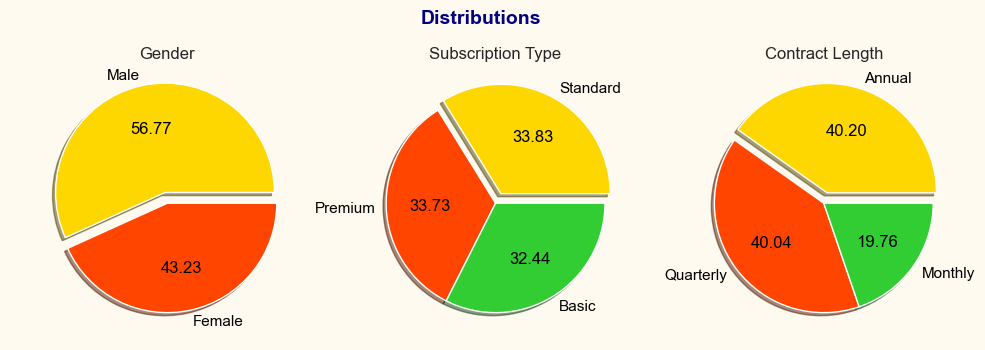

In [138]:
# Plot Pie for Gender, Subscription Type and Contract Length
fig, ax  = plt.subplots(1,3,figsize = (12,4))
colors=["gold", "orangered","limegreen"]

object["Gender"].value_counts().plot.pie(title="Gender",explode=[.1,0], textprops={"color":"black"},
                                           ax=ax[0], autopct="%.2f", shadow = True, colors = colors)

object["Subscription Type"].value_counts().plot.pie(title="Subscription Type", explode=[.1,0,0], textprops={"color":"black"},
                                                 ax=ax[1], autopct="%.2f", shadow = True, colors = colors)

object["Contract Length"].value_counts().plot.pie(title="Contract Length",explode=[.1,0,0], textprops={"color":"black"},
                                              ax=ax[2], autopct="%.2f", shadow = True, colors = colors)

ax[0].set_ylabel(" ")
ax[1].set_ylabel(" ")
ax[2].set_ylabel(" ")

#plt.axis("off")

plt.suptitle("Distributions", size = 14, color = "navy", weight = "bold")
fig.patch.set_facecolor("floralwhite")
plt.show()

When we look at these pie charts;
- We have more ***MALE*** customers.
- Subscription Types are preferred almost equally.
- Clients generally tend to prefer for ***ANNUAL*** or ***QUARTERLY*** Contract Length.

---
#### Histogram of Each Variables

In [139]:
# Numeric Variable Table
number = data.select_dtypes("number")
number.drop(["CustomerID"], axis=1, inplace=True)
number.head()

,Age,Tenure,Usage Frequency,Support Calls,Payment Delay,Total Spend,Last Interaction,Churn
0,30.0,39.0,14.0,5.0,18.0,932.0,17.0,1.0
1,65.0,49.0,1.0,10.0,8.0,557.0,6.0,1.0
2,55.0,14.0,4.0,6.0,18.0,185.0,3.0,1.0
3,58.0,38.0,21.0,7.0,7.0,396.0,29.0,1.0
4,23.0,32.0,20.0,5.0,8.0,617.0,20.0,1.0


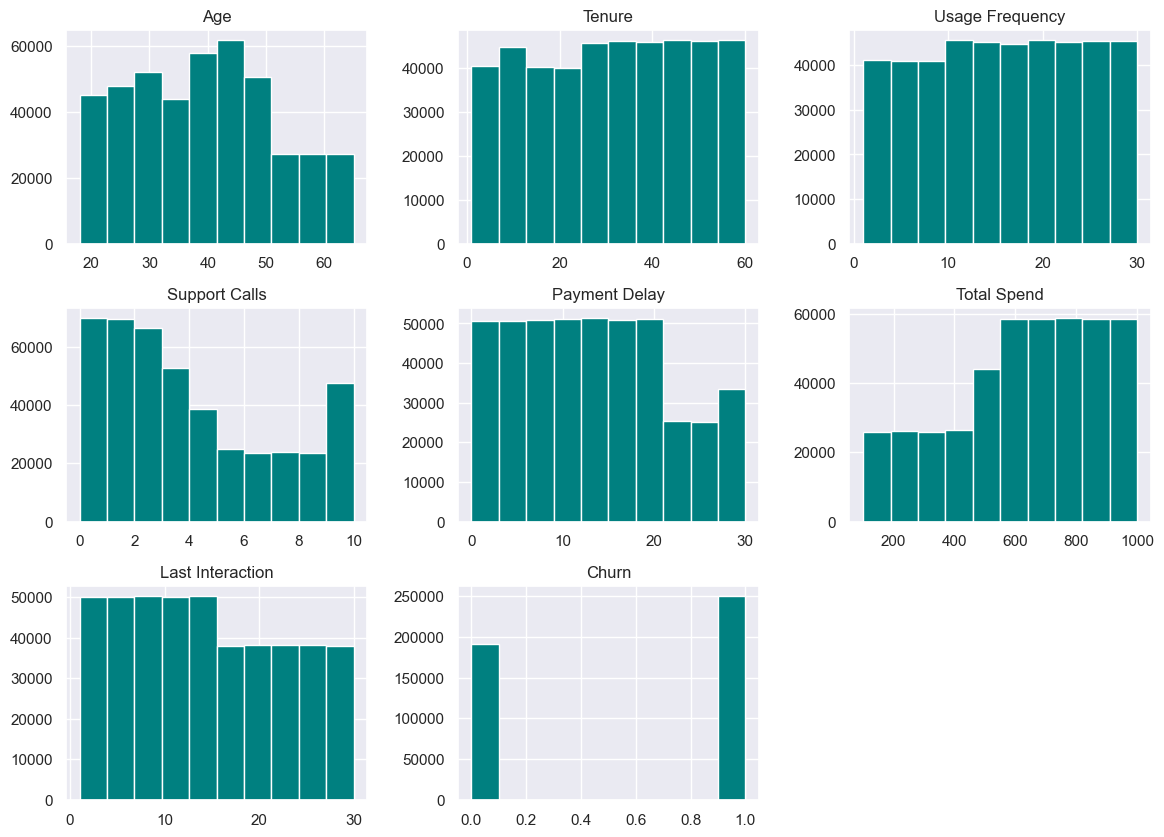

In [140]:
# Histogram of Variables
number.hist(bins=10, figsize=(14,10), color="teal")
plt.show()

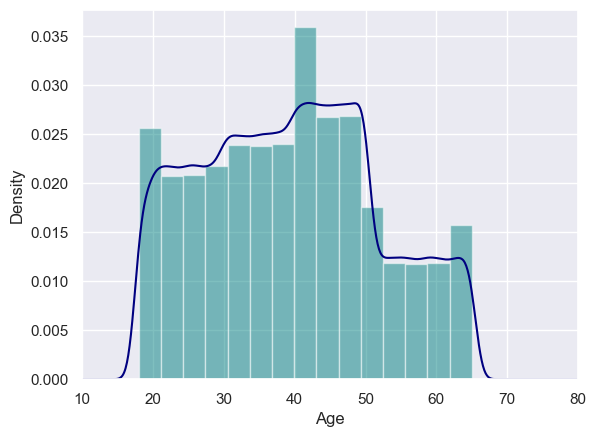

In [176]:
# Histogram of Age Distribution
Age_histogram = data["Age"].hist(bins=15, density=True, stacked=True, color="teal", alpha=0.5)
data["Age"].plot(kind="density", color= "navy")
Age_histogram.set(xlabel= "Age")
plt.xlim(10, 80)
plt.show()

---
#### Plot Boxplot for Numerical Features

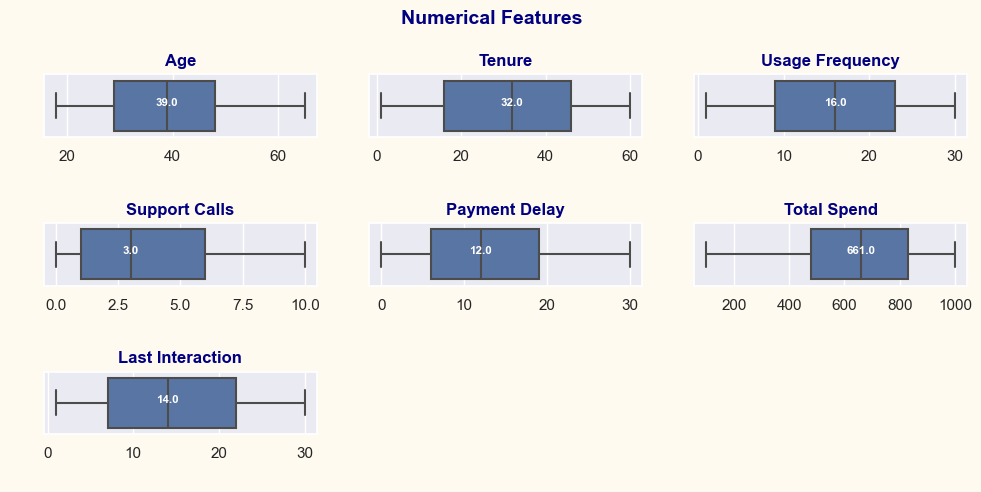

In [141]:
# Numerical columns
col_features = number[["Age", "Tenure", "Usage Frequency", "Support Calls","Payment Delay", "Total Spend", "Last Interaction"]]

# Plot Boxplot for Numerical Features
fig = plt.figure(figsize = (10,5))
fig.suptitle("Numerical Features", size = 14, color = "navy", weight = "bold")

for i,j in enumerate(col_features): # i=index, j=column name (enumerate bring index and column name)
    ax = fig.add_subplot(3,3,i+1)
    ax = sns.boxplot(data = col_features , x = j)
    #Calculate median
    median = data[j].median()
    #Plot median in the graph
    ax.text(median , ax.get_yticks(), s = '{}'.format(median), horizontalalignment="center", size="x-small", color="w", weight="semibold")
    ax.set_ylabel(' ')
    ax.set_xlabel(' ')
    ax.set_title(j, weight="semibold", color = "navy")

fig.patch.set_facecolor("floralwhite")
plt.tight_layout()

There is ***no outliers***.

In [142]:
# Plot Boxplot for Numerical Features
#for column in number[:6]:
#    plt.figure(figsize=(5,1))
#    sns.boxplot(data=number, x=column, showfliers= True)

---
#### Check Correlation

<Axes: >

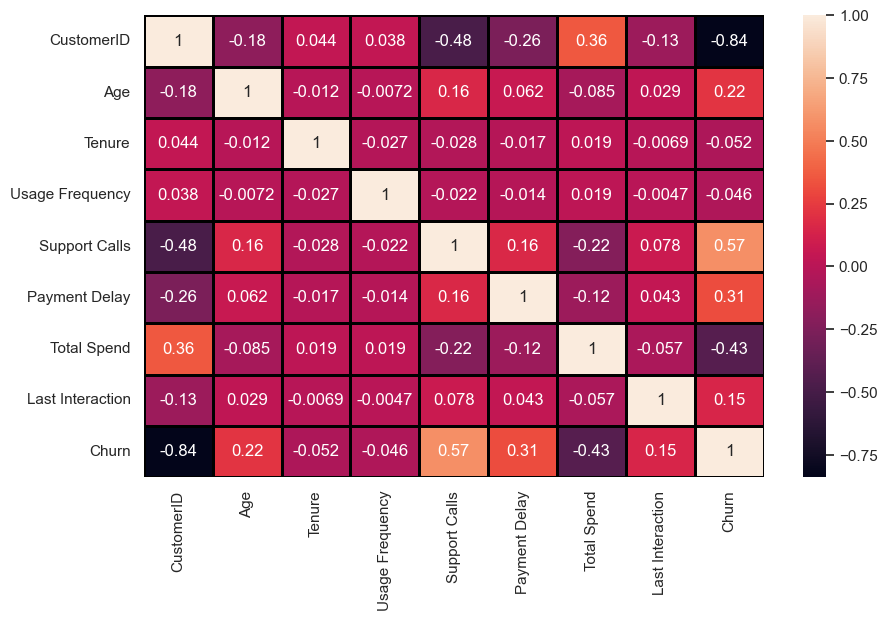

In [144]:
# Check Correlation
corr_mat = data.corr(numeric_only=True)

# Show Correlation with Heatmap
plt.figure(figsize=(10,6))
sns.heatmap(corr_mat, annot=True, linewidths=1, linecolor="black")

In this correlation map of numerical features shows us that Churn behavior is most associated with Support Calls, Total Spend and Payment Delay.  
Also, Age and Last Interaction seem to be important, respectively.  
Churn behavior tends to increase as Support Calls, Payment Delay, Age and Last Interaction increase(+) and decrease as Total Spend decreases(-).

---
### What is the Churn percentage by Gender?

In [145]:
# Count and Percentage of Churn by Gender
churn_gender = data.groupby(["Gender", "Churn"]).size().reset_index(name="Count")
churn_gender["Percentage"] = round(churn_gender["Count"] *100/ len(data),1)
churn_gender

,Gender,Churn,Count,Percentage
0,Female,0.0,63522,14.4
1,Female,1.0,127058,28.8
2,Male,0.0,127311,28.9
3,Male,1.0,122941,27.9


/var/folders/kf/ksmbz_952kn_sb3y_kwq_mth0000gp/T/ipykernel_61022/852891084.py:9: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels([f"{x:g}%" for x in vals], weight = "bold")


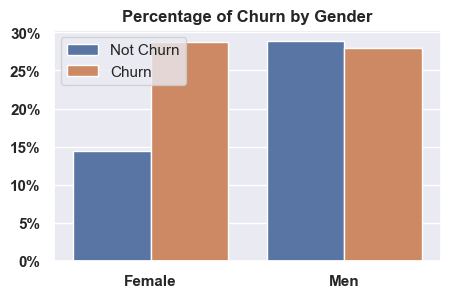

In [146]:
# Plot Percentage of Churn by Gender
plt.figure(figsize=(5,3))
sns.set(style="darkgrid")
ax = sns.barplot(x = "Gender", y = "Percentage", data=churn_gender , hue="Churn")
ax.set_title("Percentage of Churn by Gender", weight = "bold")
ax.set(xlabel= None , ylabel= None)

vals = ax.get_yticks()
ax.set_yticklabels([f"{x:g}%" for x in vals], weight = "bold")
ax.set_xticklabels(["Female", "Men"], weight = "bold")
# #ax.set_ylim([0, 50])

handles, labels = ax.get_legend_handles_labels()
labels = ["Not Churn", "Churn"]
ax.legend(handles, labels)
plt.show()

Women are twice as likely to make ***"Churn"*** decisions as ***"Not Churn"*** decisions and prone to churn more than male.

---
### What is the distribution of Contract Length on Churn?

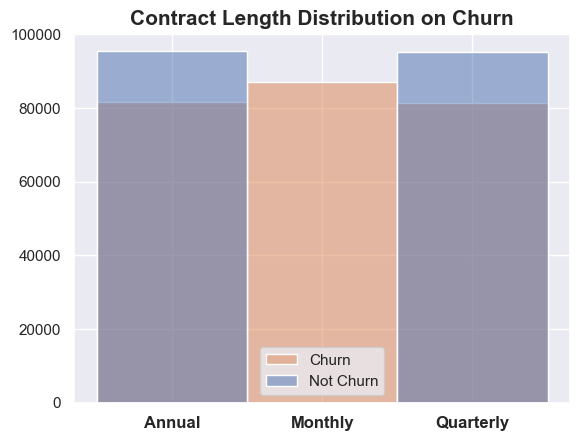

In [147]:
# Plot Contract Length Distribution on Churn
sns.set(style="darkgrid")
sns.histplot(x="Contract Length", hue="Churn", data=data)  # kde=True
plt.title("Contract Length Distribution on Churn", fontsize=15, fontweight="bold")
plt.xlabel(None)
plt.ylabel(None)
plt.xticks(fontsize=12, fontweight="bold")
legent = ["Churn", "Not Churn"]
plt.legend(legent, loc="lower center")
plt.show()

In this plotting: 
- People with a monthly contract show completely the CHURN behavior and this is probably due to the nature of the monthly contract.
- When we look at people with annual and quarterly contracts, they tend to show more NOT CHURN behavior.
- Customer with short-term contract (Monthly contract) tends to churn more than customer with long-term contract (Quarterly and Annual)

---
### What is the relationship between Usage Frequency and Churn?

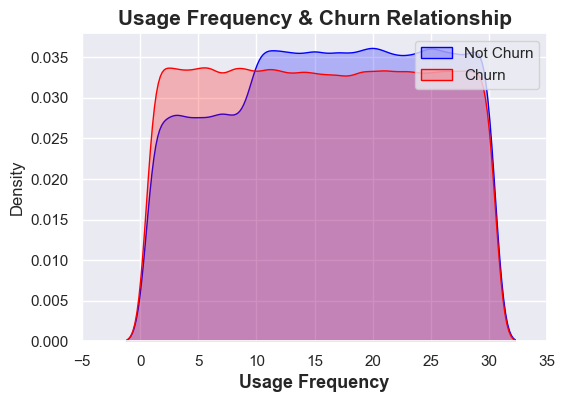

In [148]:
# Usage Frequency and Churn Relationship
plt.figure(figsize=(6,4))

ax = sns.kdeplot(number["Usage Frequency"][number.Churn == 0.0], color= "blue", fill="Fill")
sns.kdeplot(number["Usage Frequency"][number.Churn == 1.0], color="red", fill="Fill")

plt.legend(["Not Churn", "Churn"])
plt.title("Usage Frequency & Churn Relationship", fontsize=15, fontweight="bold")
ax.set_xlabel(xlabel="Usage Frequency", fontsize=13, fontweight="bold")
plt.xlim(-5, 35)
plt.show()

In this chart, we see the breakpoint of usage frequency as 10. 
If a person shows less than 10 usage frequency, they are more likely to show Churn behavior, but when they show usage frequency more than 10, they tend not to show Churn behavior.

---
### What is the relationship between Age and Churn?

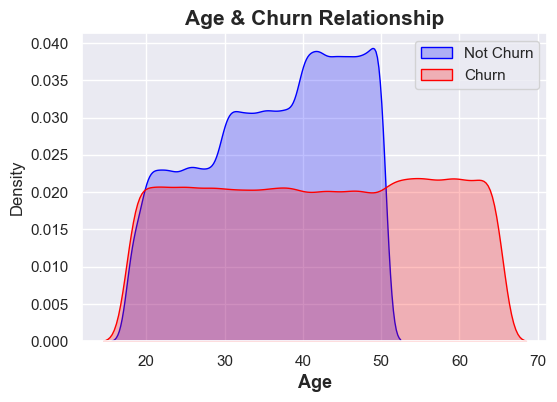

In [149]:
# Age and Churn Relationship
plt.figure(figsize=(6,4))

ax = sns.kdeplot(number["Age"][number.Churn == 0.0], color= "blue", fill="Fill")
sns.kdeplot(number["Age"][number.Churn == 1.0], color="red", fill="Fill")

plt.legend(["Not Churn", "Churn"])
plt.title("Age & Churn Relationship", fontsize=15, fontweight="bold")
ax.set_xlabel(xlabel="Age", fontsize=13, fontweight="bold")
plt.show()

Customer with age **more than 50 years old** has higher probability of Churn.

---
### What is the relationship between Support Calls and Churn?

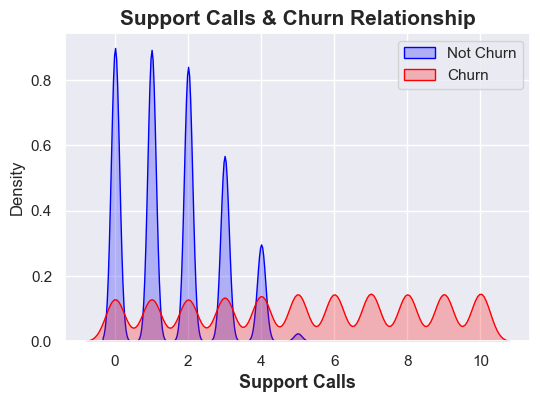

In [150]:
# Support Calls and Churn Relationship
plt.figure(figsize=(6,4))

ax = sns.kdeplot(number["Support Calls"][number.Churn == 0.0], color= "blue", fill="Fill")
sns.kdeplot(number["Support Calls"][number.Churn == 1.0], color="red", fill="Fill")

plt.legend(["Not Churn", "Churn"])
plt.title("Support Calls & Churn Relationship", fontsize=15, fontweight="bold")
ax.set_xlabel(xlabel="Support Calls", fontsize=13, fontweight="bold")
plt.show()

Customers who call for supports **more than 4 times** increase the probability of Churn.

---
### What is the relationship between Payment Delay and Churn?

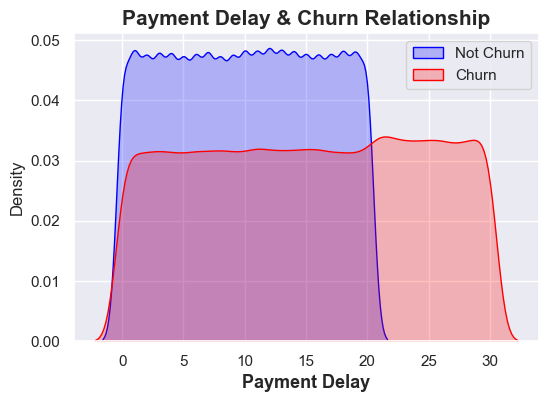

In [151]:
# Payment Delay and Churn Relationship
plt.figure(figsize=(6,4))

ax = sns.kdeplot(number["Payment Delay"][number.Churn == 0.0], color= "blue", fill="Fill")
sns.kdeplot(number["Payment Delay"][number.Churn == 1.0], color="red", fill="Fill")

plt.legend(["Not Churn", "Churn"])
plt.title("Payment Delay & Churn Relationship", fontsize=15, fontweight="bold")
ax.set_xlabel(xlabel="Payment Delay", fontsize=13, fontweight="bold")
plt.show()

Customer with payment delay **higher than 20** has higher probability to Churn.

---
### What is the relationship between Total Spend and Churn?

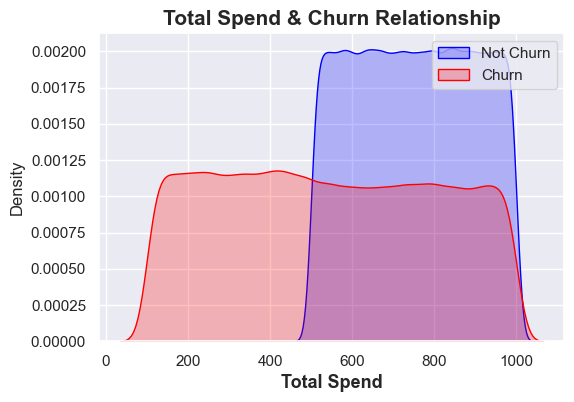

In [152]:
# Total Spend and Churn Relationship
plt.figure(figsize=(6,4))

ax = sns.kdeplot(number["Total Spend"][number.Churn == 0.0], color= "blue", fill="Fill")
sns.kdeplot(number["Total Spend"][number.Churn == 1.0], color="red", fill="Fill")

plt.legend(["Not Churn", "Churn"])
plt.title("Total Spend & Churn Relationship", fontsize=15, fontweight="bold")
ax.set_xlabel(xlabel="Total Spend", fontsize=13, fontweight="bold")
plt.show()

Customer with lower spending that is about **under 500** tends to churn more than customer with higher spending.

---
### What is the relationship between Last Interaction and Churn?

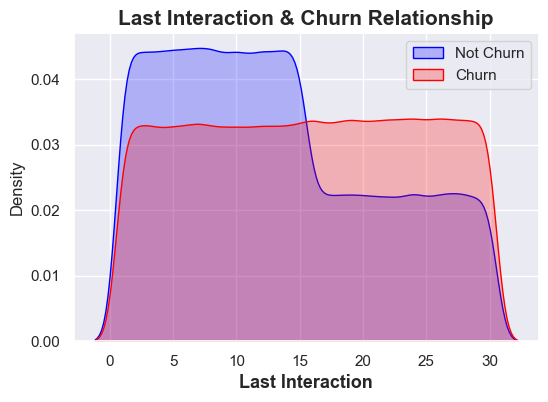

In [153]:
# Last Interaction and Churn Relationship
plt.figure(figsize=(6,4))

ax = sns.kdeplot(number["Last Interaction"][number.Churn == 0.0], color= "blue", fill="Fill")
sns.kdeplot(number["Last Interaction"][number.Churn == 1.0], color="red", fill="Fill")

plt.legend(["Not Churn", "Churn"])
plt.title("Last Interaction & Churn Relationship", fontsize=15, fontweight="bold")
ax.set_xlabel(xlabel="Last Interaction", fontsize=13, fontweight="bold")
plt.show()

Customers with last interactions **over 15 days** tends to Churn.  
So that means customer with up to date interaction tends to churn less.

---
### What is the relationship between Tenure and Churn?

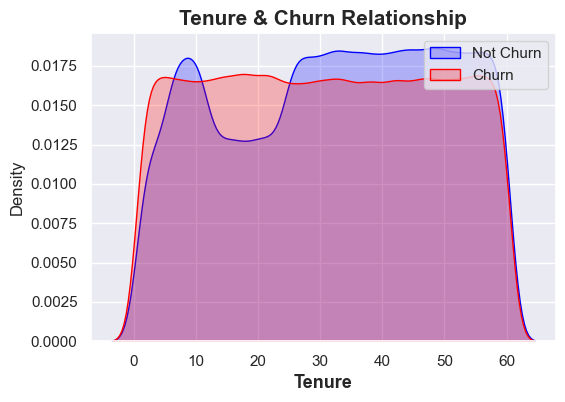

In [154]:
# Tenure and Churn Relationship
plt.figure(figsize=(6,4))

ax = sns.kdeplot(number["Tenure"][number.Churn == 0.0], color= "blue", fill="Fill")
sns.kdeplot(number["Tenure"][number.Churn == 1.0], color="red", fill="Fill")

plt.legend(["Not Churn", "Churn"])
plt.title("Tenure & Churn Relationship", fontsize=15, fontweight="bold")
ax.set_xlabel(xlabel="Tenure", fontsize=13, fontweight="bold")
plt.show()

Customers tend to show Churn behavior around 10 to 25 days.

---
#### Checking Target Label Distribution

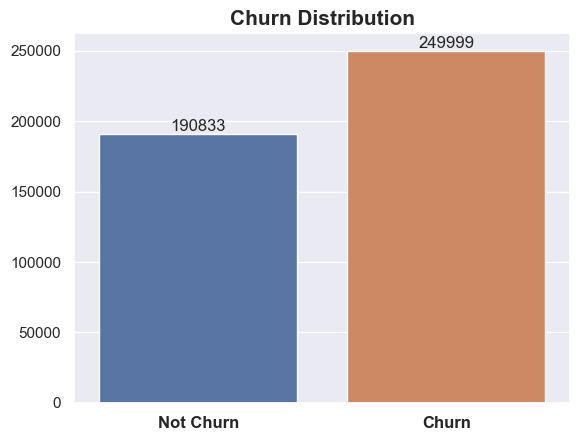

In [155]:
# Checking Target Label Distribution
ax = sns.countplot(x= data["Churn"])
ax.bar_label(ax.containers[0])
ax.set_title("Churn Distribution", fontsize=15, fontweight="bold")
#ax.set_xlabel("Churn", fontsize=13, fontweight="bold")
#ax.set_ylabel("Count", fontsize=13, fontweight="bold")
ax.set(xlabel= None , ylabel= None)
ax.set_xticklabels(["Not Churn", "Churn"], fontsize=12, fontweight="bold")
ax.tick_params(axis="x") 

The target variables are a bit imbalanced. I will use the SMOTE technique to achieve balance.

---

## Data Preprocessing

#### Data Encoding

In [156]:
# Assign Data to New Variable
data2 = data.copy()

# Drop Unused Columns
data2.drop(columns = ["CustomerID"], inplace = True)

In [157]:
# Create Dummy Variables
data2 = pd.get_dummies(data = data2, columns = ["Gender", "Subscription Type", "Contract Length"])

# Drop Unnessesary Columns
data2.drop("Gender_Female", axis=1, inplace = True)

# Rename Columns
data2.rename(columns={"Gender_Male": "Gender"}, inplace=True)
data2.head()


,Age,Tenure,Usage Frequency,Support Calls,Payment Delay,Total Spend,Last Interaction,Churn,Gender,Subscription Type_Basic,Subscription Type_Premium,Subscription Type_Standard,Contract Length_Annual,Contract Length_Monthly,Contract Length_Quarterly
0,30.0,39.0,14.0,5.0,18.0,932.0,17.0,1.0,False,False,False,True,True,False,False
1,65.0,49.0,1.0,10.0,8.0,557.0,6.0,1.0,False,True,False,False,False,True,False
2,55.0,14.0,4.0,6.0,18.0,185.0,3.0,1.0,False,True,False,False,False,False,True
3,58.0,38.0,21.0,7.0,7.0,396.0,29.0,1.0,True,False,False,True,False,True,False
4,23.0,32.0,20.0,5.0,8.0,617.0,20.0,1.0,True,True,False,False,False,True,False


In [158]:
# Re-arrange Columns
data2 = data2[["Gender", "Subscription Type_Basic", "Subscription Type_Standard", "Subscription Type_Premium", 
                 "Contract Length_Monthly", "Contract Length_Quarterly", "Contract Length_Annual", "Age", "Tenure", 
                 "Usage Frequency", "Support Calls", "Payment Delay", "Total Spend", "Last Interaction", "Churn"]]
data2.head()

,Gender,Subscription Type_Basic,Subscription Type_Standard,Subscription Type_Premium,Contract Length_Monthly,Contract Length_Quarterly,Contract Length_Annual,Age,Tenure,Usage Frequency,Support Calls,Payment Delay,Total Spend,Last Interaction,Churn
0,False,False,True,False,False,False,True,30.0,39.0,14.0,5.0,18.0,932.0,17.0,1.0
1,False,True,False,False,True,False,False,65.0,49.0,1.0,10.0,8.0,557.0,6.0,1.0
2,False,True,False,False,False,True,False,55.0,14.0,4.0,6.0,18.0,185.0,3.0,1.0
3,True,False,True,False,True,False,False,58.0,38.0,21.0,7.0,7.0,396.0,29.0,1.0
4,True,True,False,False,True,False,False,23.0,32.0,20.0,5.0,8.0,617.0,20.0,1.0


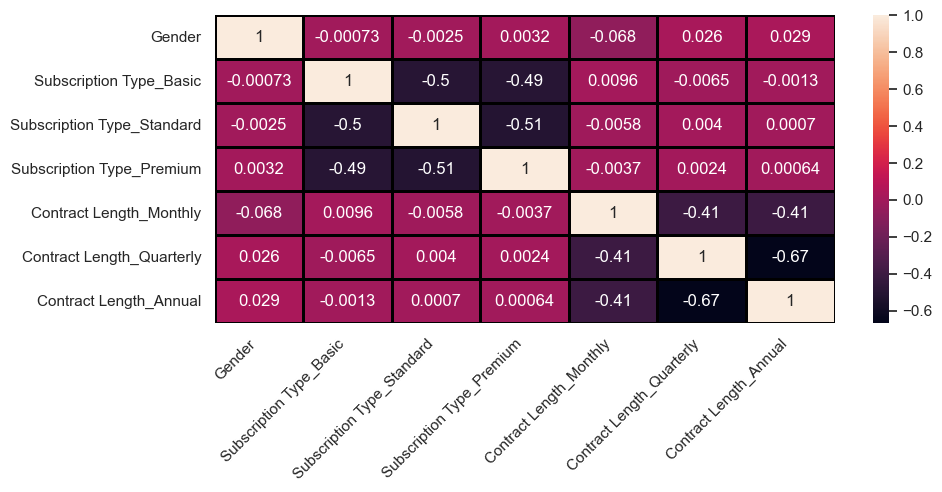

In [159]:
# Check Correlation
corr_mat = data2.iloc[:,:7].corr(numeric_only=True)

# Show Correlation with Heatmap
plt.figure(figsize=(10,4))
ax = sns.heatmap(corr_mat, annot=True, linewidths=1, linecolor="black")
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, horizontalalignment="right")
plt.show()

#### Split the Data

In [160]:
# Selecting the Dependent and Independent Variable
X = data2.iloc[:, :-1].values
y = data2.iloc[:, -1].values

In [161]:
# Fix Imbalance in Target Label with SMOTE (Synthetic Minority Over-Sampling Technique)
sm = SMOTE(random_state=42)
X_res, y_res = sm.fit_resample(X, y)

# Plot Proportion of Churn After Oversampligs
# sns.countplot(x=y_res).set(title="Proportion of Churn After Oversampligs")

In [162]:
# Split the Dataset
X_train, X_test, y_train, y_test = train_test_split(X_res, y_res, test_size=0.20, random_state=42)
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

#### Standardiazation

In [163]:
# Standardiazation (MinMaxScaler performed better than StandardScaler)
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

---
## Model Building

#### Model 1: Desicion Tree

In [164]:
# Create Default Decision Tree Classifer Object (criterion="gini")
decisionTree_model_gini = DecisionTreeClassifier()

# Use Entropy Criterion (Purity is better if entropy is low)
decisionTree_model_entropy = DecisionTreeClassifier(criterion="entropy")

# Use Max Depth
decisionTree_model_depth = DecisionTreeClassifier(max_depth=8)

# Fit the Trees
decisionTree_model_gini.fit(X_train, y_train)
decisionTree_model_entropy.fit(X_train, y_train)
decisionTree_model_depth.fit(X_train, y_train)

# Make Prediction
y_pred_gini = decisionTree_model_gini.predict(X_test)
y_pred_entropy = decisionTree_model_entropy.predict(X_test)
y_pred_depth = decisionTree_model_depth.predict(X_test)

# Check Accuracy  (If it is close to 1, means better accuracy.)
print("Accuracy (Gini):", metrics.accuracy_score(y_test, y_pred_gini))
print("Accuracy (Entropy):", metrics.accuracy_score(y_test, y_pred_entropy))
print("Accuracy (Depth):", metrics.accuracy_score(y_test, y_pred_depth))

Accuracy (Gini): 0.99985
Accuracy (Entropy): 0.99988
Accuracy (Depth): 0.99435


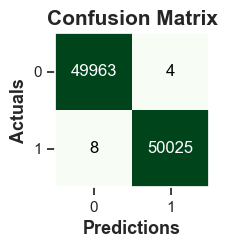

In [165]:
# Confusion Matrix
conf_mat = confusion_matrix(y_test, y_pred_entropy)

# Plot Confusion Matrix   # from mlxtend.plotting import plot_confusion_matrix
fig, ax = plot_confusion_matrix(conf_mat=conf_mat, figsize=(2,2), cmap="Greens")
plt.xlabel("Predictions", fontsize =13, weight = "bold")
plt.ylabel("Actuals", fontsize =13, weight = "bold")
plt.title("Confusion Matrix", fontsize =15, weight = "bold")
plt.show()

In [166]:
# Classification Report
print("Classification Report:\n", classification_report(y_pred_entropy, y_test))

Classification Report:
               precision    recall  f1-score   support

         0.0       1.00      1.00      1.00     49971
         1.0       1.00      1.00      1.00     50029

    accuracy                           1.00    100000
   macro avg       1.00      1.00      1.00    100000
weighted avg       1.00      1.00      1.00    100000



AUC: 0.999880


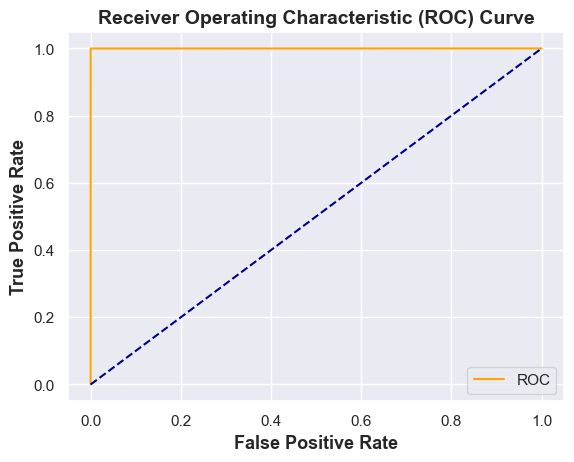

In [167]:
auc = roc_auc_score(y_test, y_pred_entropy)
print("AUC: %f" %auc)

fpr, tpr = roc_curve(y_test, y_pred_entropy)[0:2] 
# If you don't want to use [0:2], you can use underline after tpr.   fpr, tpr, _ = roc_curve()
plt.plot(fpr, tpr, color="orange", label="ROC")
plt.plot([0, 1], [0, 1], color="darkblue", linestyle="--")
plt.xlabel("False Positive Rate", fontsize =13, weight = "bold")
plt.ylabel("True Positive Rate", fontsize =13, weight = "bold")
plt.title("Receiver Operating Characteristic (ROC) Curve", fontsize =14, weight = "bold")
plt.legend()
plt.show()

#### Model 2: Random Forest

In [168]:
# Create Random Forest Classifier Object
random_forest = RandomForestClassifier()

# Fitting
random_forest.fit(X_train, y_train)

# Make Prediction
y_pred_rf = random_forest.predict(X_test)

# Check Accuracy
accuracy_rf = accuracy_score(y_test, y_pred_rf)
print("Accuracy : ", accuracy_rf)

Accuracy :  0.99941


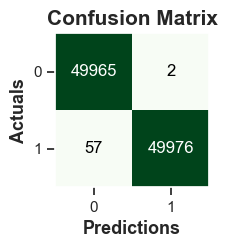

In [169]:
# Confusion Matrix
conf_mat_rf = confusion_matrix(y_test, y_pred_rf)

# Plot Confusion Matrix   # from mlxtend.plotting import plot_confusion_matrix
fig, ax = plot_confusion_matrix(conf_mat=conf_mat_rf, figsize=(2,2), cmap="Greens")
plt.xlabel("Predictions", fontsize =13, weight = "bold")
plt.ylabel("Actuals", fontsize =13, weight = "bold")
plt.title("Confusion Matrix", fontsize =15, weight = "bold")
plt.show()

In [170]:
# Classification Report
print("Classification Report : \n", classification_report(y_pred_rf, y_test))

Classification Report : 
               precision    recall  f1-score   support

         0.0       1.00      1.00      1.00     50022
         1.0       1.00      1.00      1.00     49978

    accuracy                           1.00    100000
   macro avg       1.00      1.00      1.00    100000
weighted avg       1.00      1.00      1.00    100000



AUC: 0.999410


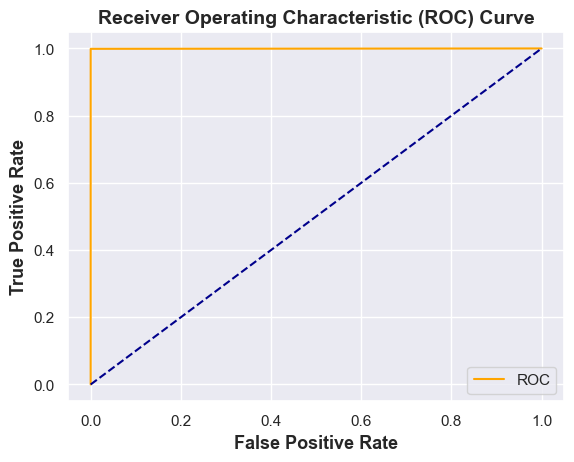

In [171]:
auc = roc_auc_score(y_test, y_pred_rf)
print("AUC: %f" %auc)

fpr, tpr = roc_curve(y_test, y_pred_rf)[0:2] 
# If you don't want to use [0:2], you can use underline after tpr.   fpr, tpr, _ = roc_curve()
plt.plot(fpr, tpr, color="orange", label="ROC")
plt.plot([0, 1], [0, 1], color="darkblue", linestyle="--")
plt.xlabel("False Positive Rate", fontsize =13, weight = "bold")
plt.ylabel("True Positive Rate", fontsize =13, weight = "bold")
plt.title("Receiver Operating Characteristic (ROC) Curve", fontsize =14, weight = "bold")
plt.legend()
plt.show()